In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import os

In [2]:
df = pd.read_excel("/content/drive/MyDrive/delivery_time.xlsx")
print("Dataset:\n", df.head(), "\n")

Dataset:
    distance_km  time_min
0            2         6
1            3         8
2            5        12
3            7        16
4           10        22 



In [3]:
X = df[["distance_km"]].values
y = df["time_min"].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [6]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
y_pred_test = model.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("R2 score:", r2_score(y_test, y_pred_test))
print("Model coef (on scaled X):", model.coef_[0], " intercept:", model.intercept_, "\n")

MAE: 1.1842378929335002e-15
R2 score: 1.0
Model coef (on scaled X): 14.955716946631314  intercept: 25.428571428571427 



In [8]:
os.makedirs("models", exist_ok=True)
model_file  = "models/delivery_time_model.joblib"
scaler_file = "models/distance_scaler.joblib"
joblib.dump(model, model_file)
joblib.dump(scaler, scaler_file)
print(f"Saved model -> {model_file}")
print(f"Saved scaler -> {scaler_file}\n")


Saved model -> models/delivery_time_model.joblib
Saved scaler -> models/distance_scaler.joblib



In [9]:
loaded_model = joblib.load(model_file)
loaded_scaler = joblib.load(scaler_file)

In [10]:
X_test_scaled_loaded = loaded_scaler.transform(X_test)   # same as before
y_pred_loaded = loaded_model.predict(X_test_scaled_loaded)
print("Loaded-model MAE (should match):", mean_absolute_error(y_test, y_pred_loaded))
print("Loaded-model R2 (should match):", r2_score(y_test, y_pred_loaded), "\n")

Loaded-model MAE (should match): 1.1842378929335002e-15
Loaded-model R2 (should match): 1.0 



In [11]:
X_line_orig = np.linspace(df["distance_km"].min(), df["distance_km"].max(), 200).reshape(-1,1)
X_line_scaled = loaded_scaler.transform(X_line_orig)
y_line = loaded_model.predict(X_line_scaled)

In [12]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

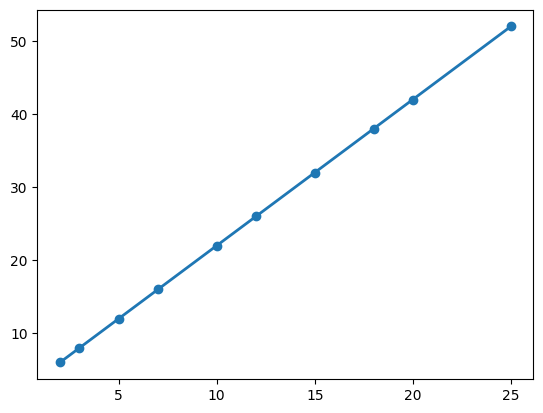

In [19]:
plt.scatter(df["distance_km"], df["time_min"], label="Actual data", zorder=3)
plt.plot(X_line_orig, y_line, label="Regression line (loaded model)", linewidth=2, zorder=2)

Text(0.5, 1.0, 'Delivery Time Prediction — Linear Regression (scaled feature)')

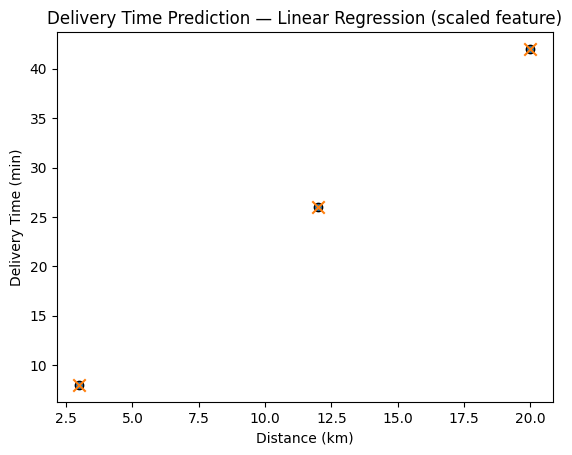

In [16]:
plt.scatter(X_test.flatten(), y_test, label="Test actual", marker="o", edgecolor="k", zorder=4)
plt.scatter(X_test.flatten(), y_pred_loaded, label="Test predicted (loaded)", marker="x", s=80, zorder=5)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Delivery Time Prediction — Linear Regression (scaled feature)")

/tmp/ipython-input-598546866.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


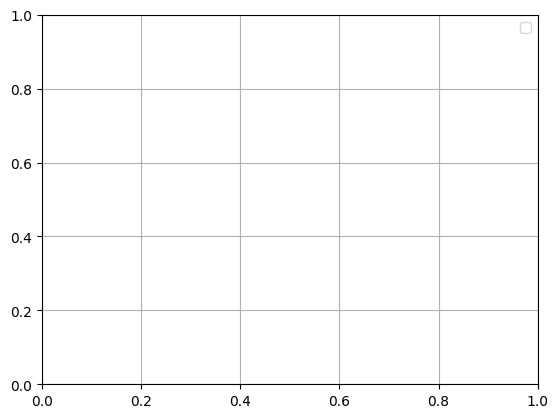

In [17]:
plt.legend()
plt.grid(True)
plt.show()

In [18]:
sample_distance = np.array([[11.5]])  # example single input (km)
sample_scaled = loaded_scaler.transform(sample_distance)
sample_pred = loaded_model.predict(sample_scaled)
print(f"Sample distance: {sample_distance.flatten()[0]} km -> Predicted delivery time: {sample_pred[0]:.2f} min")

Sample distance: 11.5 km -> Predicted delivery time: 25.00 min
